In [66]:
with open('/kaggle/input/d15-rhp0/D15-3D_by_Zones_Zaxis.dat','r',encoding='utf-8') as f:
      content = f.read()

In [67]:
import pandas as pd
with open('/kaggle/input/d15-rhp0/D15-3D_by_Zones_Zaxis.dat','r') as f:
    lines = f.readlines()[2:]
data1=[[float(x) for x in line.split()]for line in lines]
df1 = pd.DataFrame(data1,columns=['pbt','rh+0','rhx0','rh+1','rhx1','rh+2','rhx2','rh+3','rhx3','rh+4','rhx4','rh+5','rhx5','rh+t','rhxt'])

In [68]:
import numpy as np
import os, shutil
import matplotlib.pyplot as plt
from scipy import interpolate, fftpack, signal
from scipy.signal import butter, lfilter, freqz


# Constants

cm2kpc = 3.24078e-22
kpc2m  = 3.08567758128e+19 # m
D10kpc = 10.0 * kpc2m # 10 kpc in m
tenkpc = 3.08567758e18*1.e3*10.
c = 2.99792458e8 # m/s
G = 6.67430e-11 # m^3 kg^−1 s^−2
msun = 1.9885e+30 # kg
esun = msun*c**2 # J

In [69]:
#Resample function
def sn_resample_wave(t,h,fs):
    """
    Interpolate array h to the fs sampling frequency.

    Input:
        t  - time array, in seconds
        h  - strain array to be interpolated
        fs - sampling frequency
    Output:
        t1 - time array, after resampling
        h1 - new strain array
    """

    # Quick check
    if len(t)!=len(h):
        print("Error: t and h need to have equal sizes")
        return 0

    # Define new time with fs
    t1 = np.arange(t[0],t[-1],1.0/fs)

    # Interpolation
    tck = interpolate.splrep(t,h,s=0)
    h1  = interpolate.splev(t1,tck,der=0)

    return t1, h1

In [70]:
pbt = df1['pbt'].to_numpy()
rhp0 = df1['rh+0'].to_numpy()
rhx0 = df1['rhx0'].to_numpy()
rhp1 = df1['rh+1'].to_numpy()
rhp2 = df1['rh+2'].to_numpy()
rhp3 = df1['rh+3'].to_numpy()
rhp4 = df1['rh+4'].to_numpy()
rhp5 = df1['rh+5'].to_numpy()
rhpt = df1['rh+t'].to_numpy()
rhx1 = df1['rhx1'].to_numpy()
rhx2 = df1['rhx2'].to_numpy()
rhx3 = df1['rhx3'].to_numpy()
rhx4 = df1['rhx4'].to_numpy()
rhx5 = df1['rhx5'].to_numpy()
rhxt = df1['rhxt'].to_numpy()

In [71]:
# Libraries

import numpy as np
import os, shutil
import matplotlib.pyplot as plt
from scipy import interpolate, fftpack, signal
from scipy.signal import butter, lfilter, freqz


# Constants

cm2kpc = 3.24078e-22
kpc2m  = 3.08567758128e+19 # m
D10kpc = 10.0 * kpc2m # 10 kpc in m

c = 2.99792458e8 # m/s
G = 6.67430e-11 # m^3 kg^−1 s^−2
msun = 1.9885e+30 # kg
esun = msun*c**2 # J

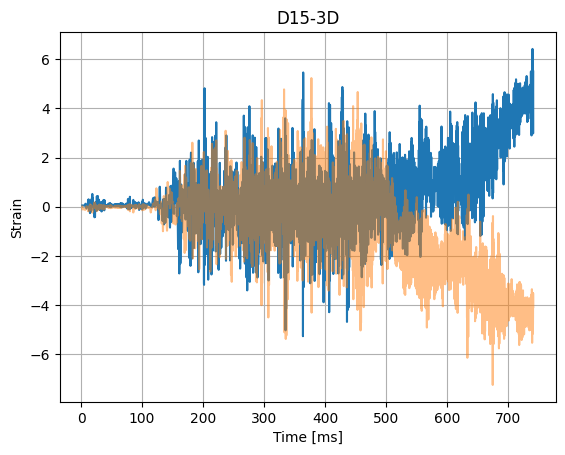

In [72]:
# Input data for region 0
name = 'D15-3D'

inFile ='/kaggle/input/d15-rhp0/D15-3D_by_Zones_Zaxis.dat'
data = np.loadtxt(inFile)

fs = 4096  # Default resampling frequency
fcut = 10 # Hz, # cut off frequencies below 10 Hz  # Highpass filter
nleft  = 0.0     # Remove edges. This step is needed because of the interpolation that does not well interpolate edges
nright = 0.0
# Default distance, 10kpc in m
D = D10kpc
(phi_eq, theta_eq) = (0.0, np.pi/2.0)

# Plot the waveforms
plt.figure()
plt.plot(pbt,rhpt,label='hplus')
plt.plot(pbt,rhxt,label='hcross',alpha=0.5)
plt.title("{0:s}".format(name))
plt.xlabel('Time [ms]')
plt.ylabel('Strain')
plt.grid()
plt.show()

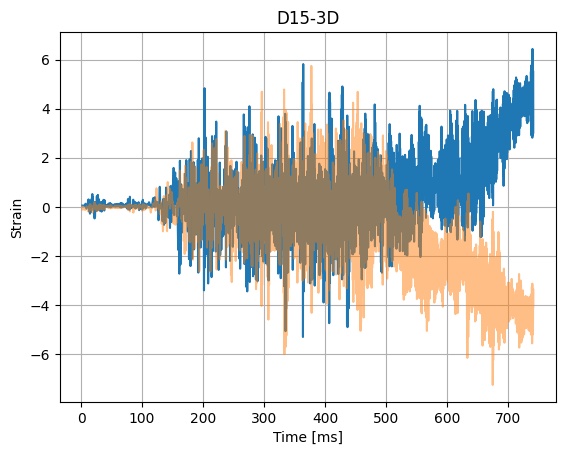

In [73]:
# Processing (resampling, removing edge artifacts) for a waveform
# to make sure the processing went well(just for clarity purposes) for region 0


# Make interpolation for the strain
t, hp  = sn_resample_wave(pbt, rhpt, fs)
t, hc  = sn_resample_wave(pbt, rhxt, fs)



# Plot the waveforms
plt.figure()
plt.plot(t,hp,label='hp equator')
plt.plot(t,hc,label='hc equator',alpha=0.5)
plt.title(name)
plt.xlabel('Time [ms]')
plt.ylabel('Strain')
plt.grid()
plt.show()

In [74]:
import numpy as np
pbt100=pbt[pbt>=100]
print(pbt100)

[100.      100.2     100.4     ... 741.      741.20001 741.40002]


In [75]:
import numpy as np

index = np.where(pbt == 100)[0][0]

print(index)

490


In [76]:
import numpy as np
RHP0 = (rhp0[490:])
RHP1 = (rhp1[490:])
RHP2 = (rhp2[490:])
RHP3 = (rhp3[490:])
RHP4= (rhp4[490:])
RHP5= (rhp5[490:])
RHPT = (rhpt[490:])
RHX0 = (rhx0[490:])
RHX1 = (rhx1[490:])
RHX2 = (rhx2[490:])
RHX3 = (rhx3[490:])
RHX4 = (rhx4[490:])
RHX5 = (rhx5[490:])
RHXT = (rhxt[490:])

In [77]:
import numpy as np
RHP0f = (rhp0[490:])/tenkpc
RHP1f = (rhp1[490:])/tenkpc
RHP2f = (rhp2[490:])/tenkpc
RHP3f = (rhp3[490:])/tenkpc
RHP4f = (rhp4[490:])/tenkpc
RHP5f= (rhp5[490:])/tenkpc
RHPTf = (rhpt[490:])/tenkpc
RHX0f = (rhx0[490:])/tenkpc
RHX1f = (rhx1[490:])/tenkpc
RHX2f = (rhx2[490:])/tenkpc
RHX3f = (rhx3[490:])/tenkpc
RHX4f = (rhx4[490:])/tenkpc
RHX5f = (rhx5[490:])/tenkpc
RHXTf = (rhxt[490:])/tenkpc

In [78]:
print(RHPTf)
np.savetxt('D15_100_RHT_4096_hplus.txt',RHPTf, fmt='%s')

[ 3.01121350e-24 -2.13918137e-24 -3.35043009e-24 ...  1.46614744e-22
  9.67882069e-23  1.78391460e-22]


In [79]:
print(RHXTf)
np.savetxt('D15_100_RHT_4096_hcross.txt',RHXTf, fmt='%s')

[-4.56248122e-24 -4.02863445e-24  3.52187574e-25 ... -1.54695647e-22
 -1.14011400e-22 -1.32193102e-22]


In [80]:
RHP12f = RHP1f+RHP2f
RHX12f = RHX1f+RHX2f
RHP34f = RHP3f+RHP4f
RHX34f = RHX3f+RHX4f
RHP1234f = RHP1f+RHP2f+RHP3f+RHP4f
RHX1234f = RHX1f+RHX2f+RHX3f+RHX4f
print(RHXTf)
np.savetxt('D15_100_RHT_4096_hcross.txt',RHXTf, fmt='%s')
print(RHPTf)
np.savetxt('D15_100_RHT_4096_hplus.txt',RHPTf, fmt='%s')
print(RHP12f)
np.savetxt('D15_100_RH12_4096_hplus.txt',RHP12f, fmt='%s')
print(RHP34f)
np.savetxt('D15_100_RH34_4096_hplus.txt',RHP34f, fmt='%s')
print(RHP1234f)
np.savetxt('D15_100_RH1234_4096_hplus.txt',RHP1234f, fmt='%s')
print(RHX12f)
np.savetxt('D15_100_RH12_4096_hcross.txt',RHX12f, fmt='%s')
print(RHX34f)
np.savetxt('D15_100_RH34_4096_hcross.txt',RHX34f, fmt='%s')
print(RHX1234f)
np.savetxt('D15_100_RH1234_4096_hcross.txt',RHX1234f, fmt='%s')
print(pbt100)
np.savetxt('D15_100_pbt_4096.txt',pbt100, fmt='%s')

[-4.56248122e-24 -4.02863445e-24  3.52187574e-25 ... -1.54695647e-22
 -1.14011400e-22 -1.32193102e-22]
[ 3.01121350e-24 -2.13918137e-24 -3.35043009e-24 ...  1.46614744e-22
  9.67882069e-23  1.78391460e-22]
[ 2.27770524e-24 -6.52100269e-24 -1.25982592e-23 ...  2.60051149e-24
 -3.72051898e-23  3.35651501e-23]
[-3.38727055e-24  2.11318810e-24  9.12640652e-24 ... -7.57308221e-25
 -7.87758781e-24  3.27469502e-24]
[-1.10956531e-24 -4.40781459e-24 -3.47185266e-24 ...  1.84320327e-24
 -4.50827776e-23  3.68398451e-23]
[-7.86954417e-24 -6.10955837e-24  1.98498587e-24 ... -1.40631151e-23
  1.57654164e-23  5.97168577e-24]
[ 3.91003697e-24  4.24938451e-24  5.54591190e-25 ... -9.62712475e-25
  5.32089552e-24 -4.40667960e-24]
[-3.95950720e-24 -1.86017386e-24  2.53957706e-24 ... -1.50258276e-23
  2.10863119e-23  1.56500617e-24]
[100.      100.2     100.4     ... 741.      741.20001 741.40002]


In [81]:
import zipfile

file_names = ["D15_100_pbt_4096.txt", "D15_100_RHT_4096_hcross.txt", "D15_100_RHT_4096_hplus.txt", "D15_100_RH12_4096_hcross.txt", "D15_100_RH12_4096_hplus.txt", "D15_100_RH34_4096_hcross.txt", "D15_100_RH34_4096_hplus.txt", "D15_100_RH1234_4096_hcross.txt", "D15_100_RH1234_4096_hplus.txt"]

# Name of the output ZIP file
zip_file_name = "D15_100_data_4096.zip"

# Create the ZIP file and add only the specified files
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for file in file_names:
        zipf.write(file)

print(f"ZIP file '{zip_file_name}' created with files: {file_names}")


ZIP file 'D15_100_data_4096.zip' created with files: ['D15_100_pbt_4096.txt', 'D15_100_RHT_4096_hcross.txt', 'D15_100_RHT_4096_hplus.txt', 'D15_100_RH12_4096_hcross.txt', 'D15_100_RH12_4096_hplus.txt', 'D15_100_RH34_4096_hcross.txt', 'D15_100_RH34_4096_hplus.txt', 'D15_100_RH1234_4096_hcross.txt', 'D15_100_RH1234_4096_hplus.txt']


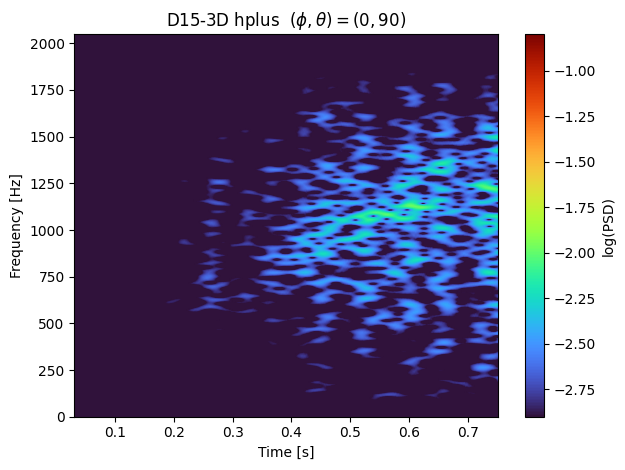

In [82]:
import numpy as np
# Spectrogram for RHP0
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP0, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd0+.png")
plt.show()

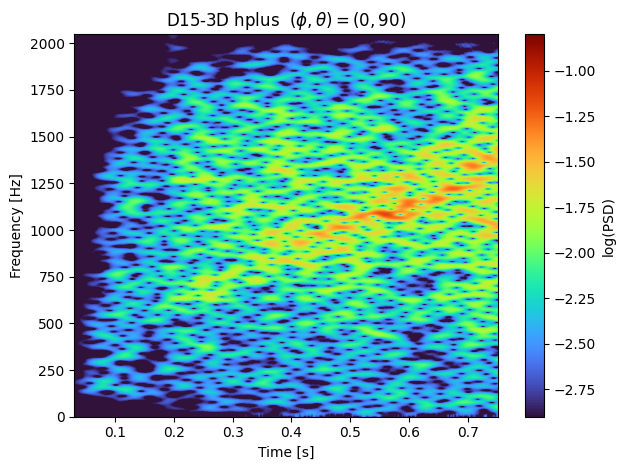

In [83]:
import numpy as np
# Spectrogram for RHP1
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP1, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd1+.png")
plt.show()

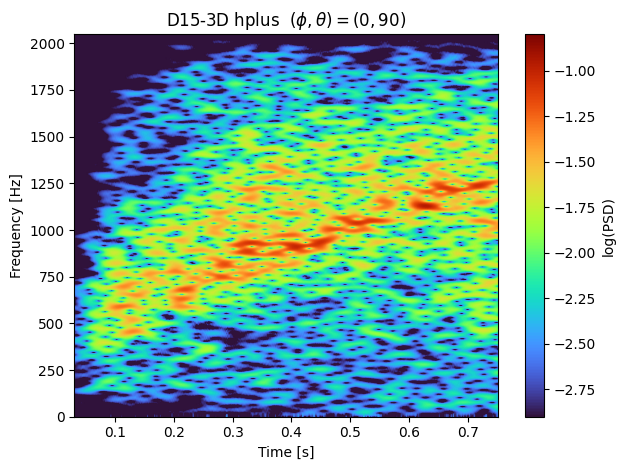

In [84]:
import numpy as np
# Spectrogram for RHP2
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP2, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd2+.png")
plt.show()

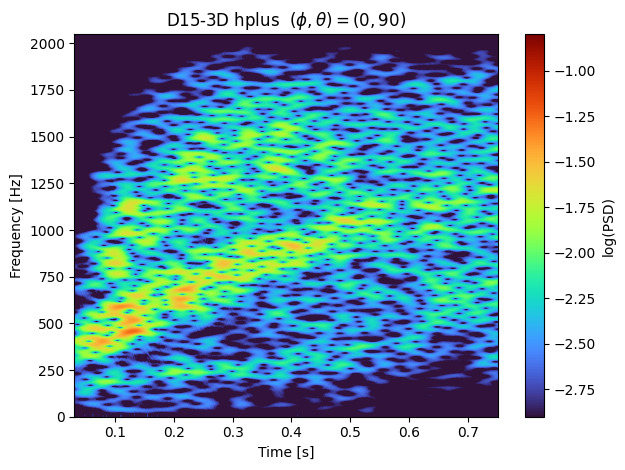

In [85]:
import numpy as np
# Spectrogram for RHP3
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP3, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd3+.png")
plt.show()

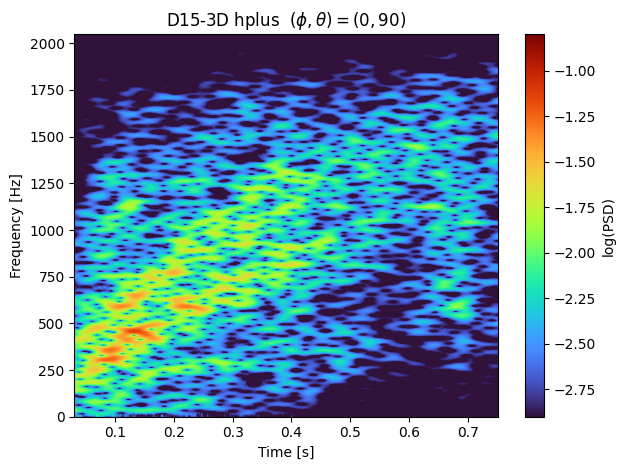

In [86]:
import numpy as np
# Spectrogram for RHP4
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHP4, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd4+.png")
plt.show()

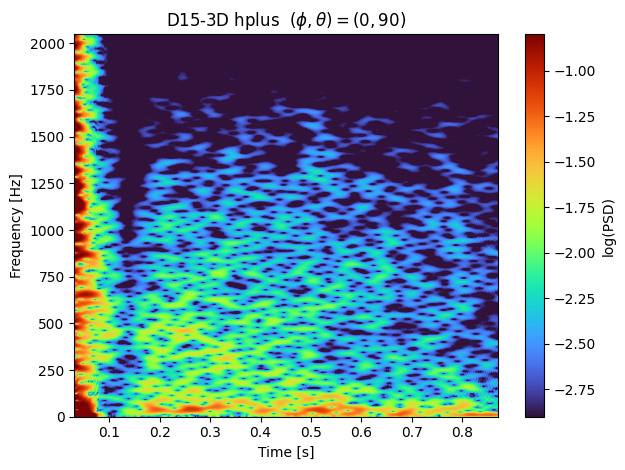

In [87]:
import numpy as np
# Spectrogram for RHP5
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rhp5, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd5+.png")
plt.show()

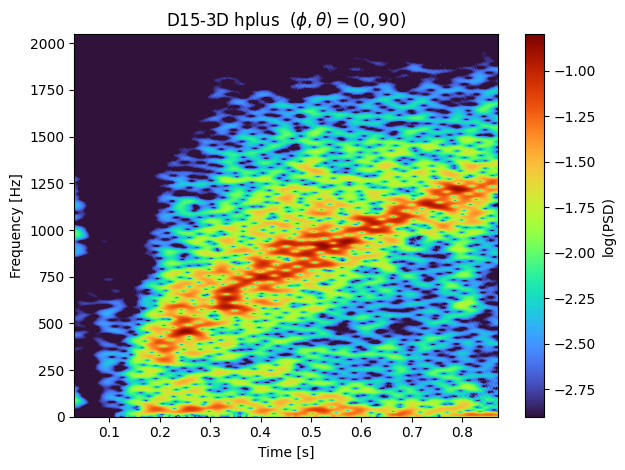

In [88]:
import numpy as np
# Spectrogram for rhpt
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rhpt, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hplus  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsdt+.png")
plt.show()

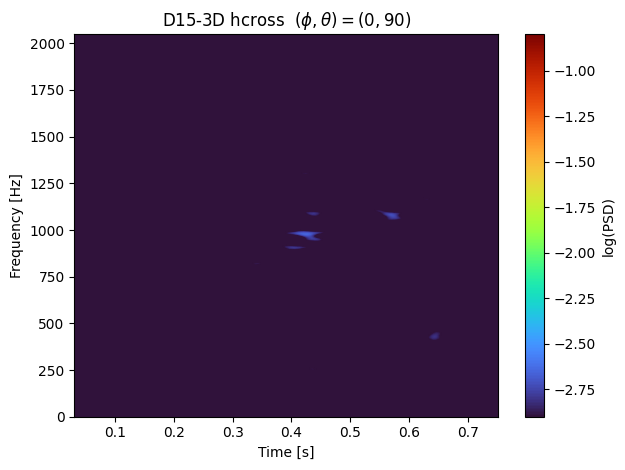

In [89]:
import numpy as np
# Spectrogram for RHX0
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX0, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd0x.png")
plt.show()

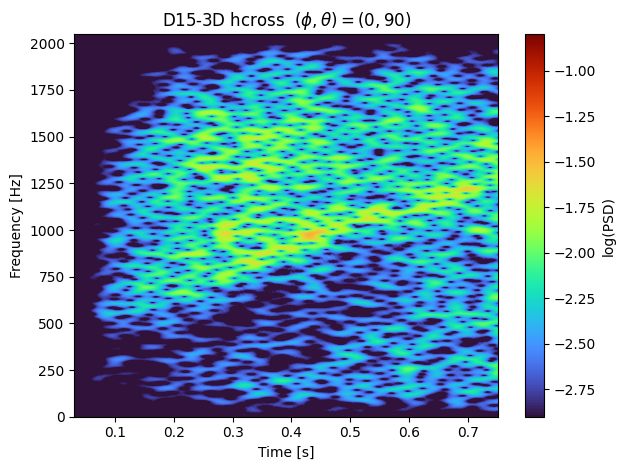

In [90]:
import numpy as np
# Spectrogram for RHX1
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX1, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd1x.png")
plt.show()

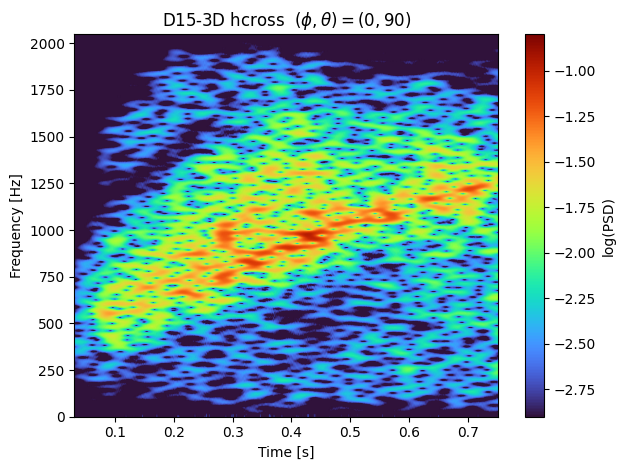

In [91]:
import numpy as np
# Spectrogram for RHX2
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX2, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd2x.png")
plt.show()

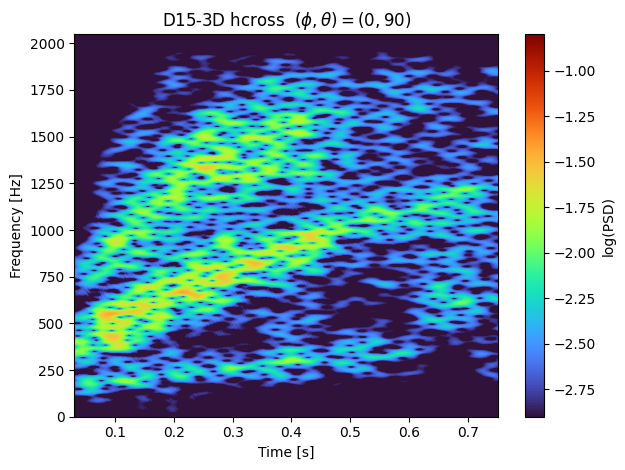

In [92]:
import numpy as np
# Spectrogram for RHX3
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX3, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd3x.png")
plt.show()

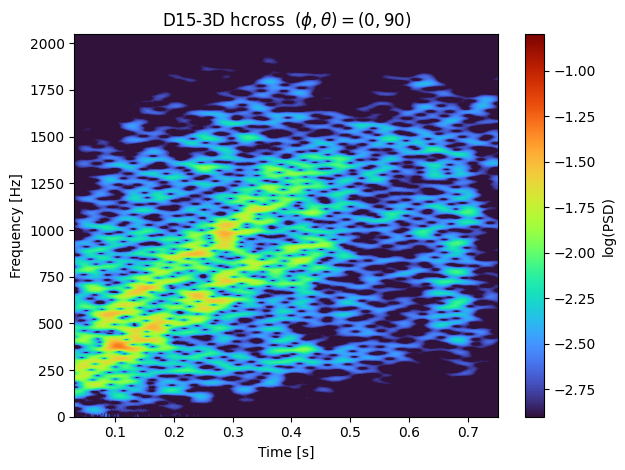

In [93]:
import numpy as np
# Spectrogram for RHX4
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX4, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd4x.png")
plt.show()

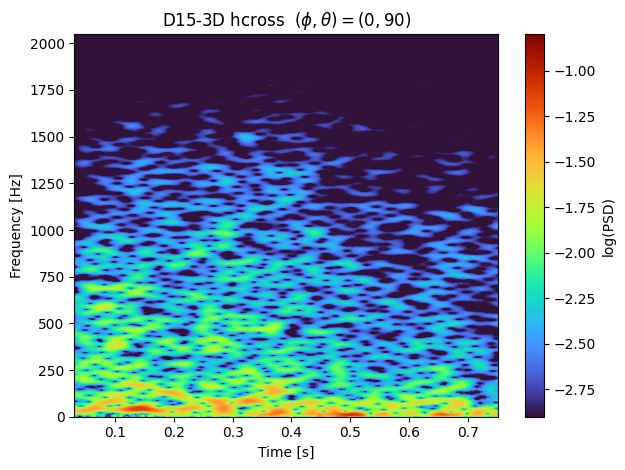

In [94]:
import numpy as np
# Spectrogram for RHX5
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHX5, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsd5x.png")
plt.show()

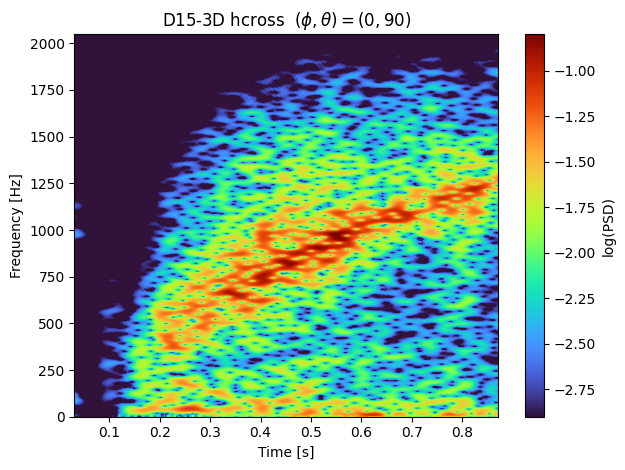

In [95]:
import numpy as np
# Spectrogram for rhxt
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rhxt, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()
plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} hcross  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_0_spectrogrampsdtx.png")
plt.show()

# ** PSD Combos** 

In [96]:
rh = rhpt+rhxt
RH = RHPT+RHXT
print(rh)
print(RH)

[ 0.06665109 -0.05320398 -0.05389218 ... -0.2493506  -0.5314522
  1.4255324 ]
[-0.04786712 -0.19031891 -0.0925161  ... -0.2493506  -0.5314522
  1.4255324 ]


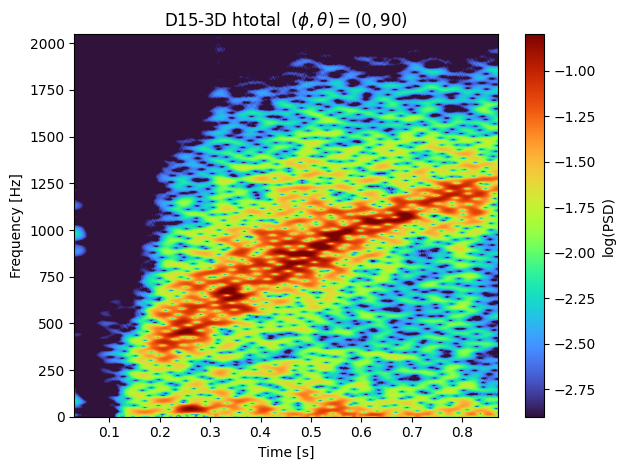

In [97]:
import numpy as np
# Spectrogram for Total GW signal(after 0ms)
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(rh, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} htotal  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_0_total.png")
plt.show()

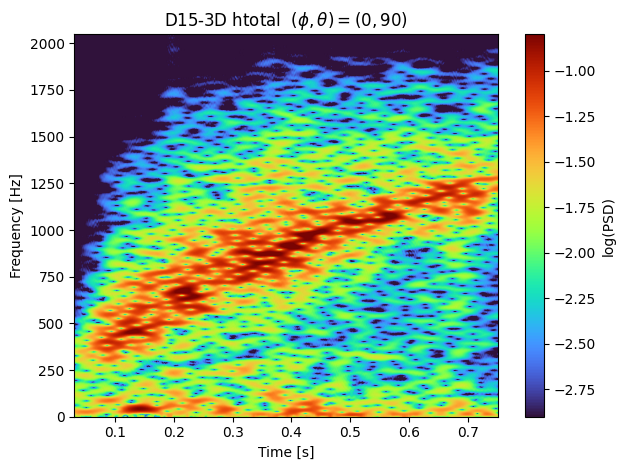

In [98]:
import numpy as np
# Spectrogram for Total GW signal(after 100ms)
# Computation WILL take a while
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} htotal  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_total.png")
plt.show()

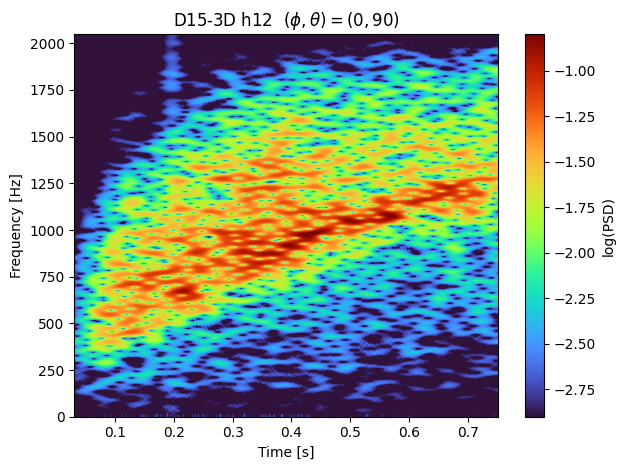

In [99]:
import numpy as np
# Spectrogram for RH12
# Computation WILL take a while
RH12 = RHP1+RHP2+RHX1+RHX2
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH12, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} h12  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_12.png")
plt.show()

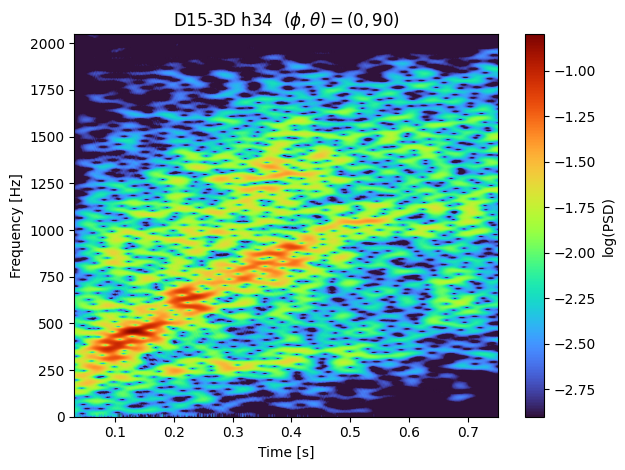

In [100]:
import numpy as np
# Spectrogram for RH34
# Computation WILL take a while
RH34 = RHP3+RHP4+RHX3+RHX4
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH34, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} h34  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_34.png")
plt.show()

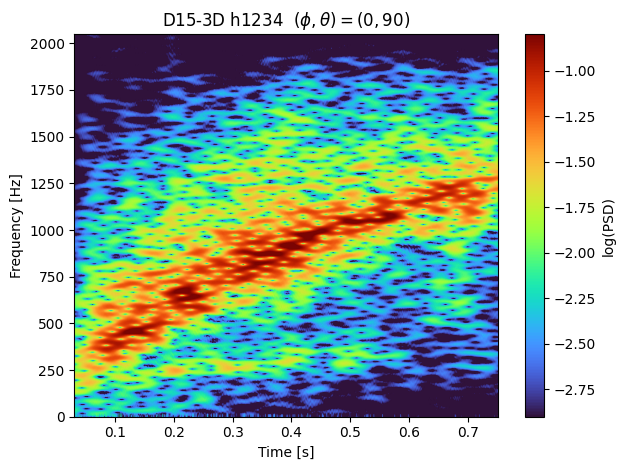

In [101]:
import numpy as np
# Spectrogram for RHS
# Computation WILL take a while
RHS = RHP3+RHP4+RHX3+RHX4+RHP2+RHP1+RHX2+RHX1
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHS, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

log_psd = np.log10(Sxx)
plt.figure()

plt.pcolormesh(txx, fxx, log_psd, shading='gouraud', cmap='turbo' ,vmin=-2.9,vmax=-0.8)
cbar = plt.colorbar()
cbar.set_label('log(PSD)')
plt.title(r"{0:s} h1234  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.tight_layout()
plt.savefig(name+"_100_Sum.png")
plt.show()

# ** Amplitude Combos** 

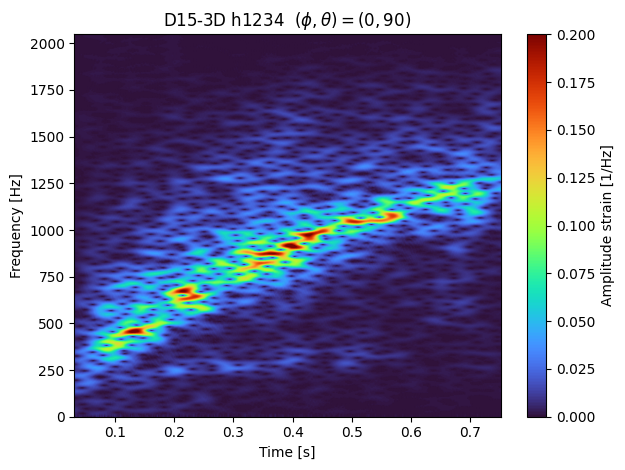

In [102]:
import numpy as np
# Spectrogram for RHS
# Computation WILL take a while
RHS = RHP3+RHP4+RHX3+RHX4+RHP2+RHP1+RHX2+RHX1
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RHS, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

plt.figure()
plt.pcolormesh(txx, fxx, Sxx, shading='gouraud', cmap='turbo' ,vmin=0,vmax=0.2)
cbar = plt.colorbar()
cbar.set_label('Amplitude strain [1/Hz]')
plt.ylim([0,2048])
plt.title(r"{0:s} h1234  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_A100_Sum_.png")
plt.show()

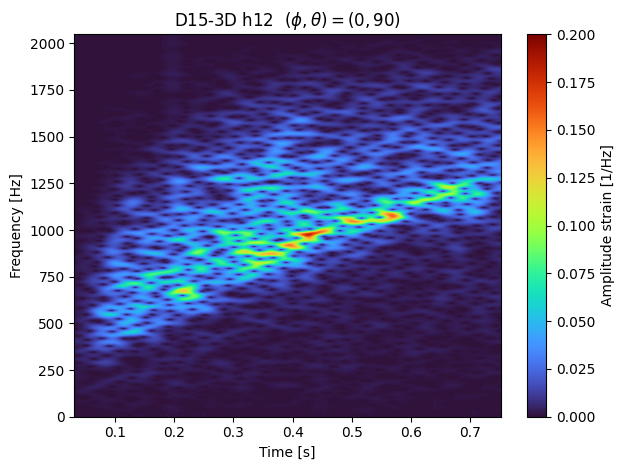

In [103]:
import numpy as np
# Spectrogram for RH12
# Computation WILL take a while
RH12 = RHP2+RHP1+RHX2+RHX1
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH12, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

plt.figure()
plt.pcolormesh(txx, fxx, Sxx, shading='gouraud', cmap='turbo' ,vmin=0,vmax=0.2)
cbar = plt.colorbar()
cbar.set_label('Amplitude strain [1/Hz]')
plt.ylim([0,2048])
plt.title(r"{0:s} h12  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_A100_12.png")
plt.show()

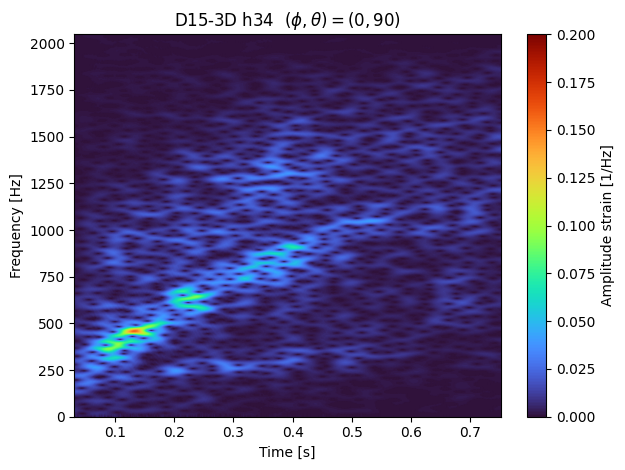

In [104]:
import numpy as np
# Spectrogram for RH34
# Computation WILL take a while
RH34 = RHP3+RHP4+RHX3+RHX4
wnd="hamming"
nfft=4*512
nperseg=256
noverlap=256-5
txx=pbt100
(phi_eq, theta_eq) = (0.0, np.pi/2.0) # Equator
fxx, txx, Sxx = signal.spectrogram(RH34, fs, window=wnd, nfft=nfft, nperseg=nperseg, noverlap=noverlap, mode='magnitude')

plt.figure()
plt.pcolormesh(txx, fxx, Sxx, shading='gouraud', cmap='turbo' ,vmin=0,vmax=0.2)
cbar = plt.colorbar()
cbar.set_label('Amplitude strain [1/Hz]')
plt.ylim([0,2048])
plt.title(r"{0:s} h34  $(\phi,\theta)=({1:.0f}, {2:.0f})$".format(name, phi_eq*180.0/np.pi, theta_eq*180.0/np.pi))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(name+"_A100_34.png")
plt.show()

In [105]:
tenkpc = 3.08567758e18*1.e3*10.
RH12f = RH12/tenkpc
RH34f = RH34/tenkpc
RHSf = RHS/tenkpc
RHf = RH/tenkpc
print(RH12f)
print(RH34f)
print(RHSf)
print(RHf)

[-5.59183892e-24 -1.26305611e-23 -1.06132733e-23 ... -1.14626036e-23
 -2.14397734e-23  3.95368358e-23]
[ 5.22766413e-25  6.36257261e-24  9.68099771e-24 ... -1.72002070e-24
 -2.55669230e-24 -1.13198458e-24]
[-5.06907251e-24 -6.26798845e-24 -9.32275594e-25 ... -1.31826243e-23
 -2.39964657e-23  3.84048512e-23]
[-1.55126771e-24 -6.16781582e-24 -2.99824251e-24 ... -8.08090261e-24
 -1.72231928e-23  4.61983588e-23]


In [106]:
print(RH12f)
np.savetxt('D15_100_RH12_4096.txt', RH12f, fmt='%s')

[-5.59183892e-24 -1.26305611e-23 -1.06132733e-23 ... -1.14626036e-23
 -2.14397734e-23  3.95368358e-23]


In [107]:
print(RH34f)
np.savetxt('D15_100_RH34_4096.txt', RH34f, fmt='%s')

[ 5.22766413e-25  6.36257261e-24  9.68099771e-24 ... -1.72002070e-24
 -2.55669230e-24 -1.13198458e-24]


In [108]:
print(RHSf)
np.savetxt('D15_100_RH1234_4096.txt',RHSf, fmt='%s')

[-5.06907251e-24 -6.26798845e-24 -9.32275594e-25 ... -1.31826243e-23
 -2.39964657e-23  3.84048512e-23]


In [109]:
print(RHf)
np.savetxt('D15_100_RHT_4096.txt',RHf, fmt='%s')

[-1.55126771e-24 -6.16781582e-24 -2.99824251e-24 ... -8.08090261e-24
 -1.72231928e-23  4.61983588e-23]


In [110]:
print(pbt100)
np.savetxt('D15_100_pbt_4096.txt',pbt100, fmt='%s')

[100.      100.2     100.4     ... 741.      741.20001 741.40002]
